<h1> Merging CSV files</h1>

In [2]:
import csv

lst = []

def data_write(d):

    keys = d[0].keys()

    with open(f'final.csv', 'w', newline='', encoding='utf-8') as of:

        dict_writer = csv.DictWriter(of, keys)

        dict_writer.writeheader()

        dict_writer.writerows(d)

    with open("readability.csv", newline='') as csvfile:

        reader = csv.DictReader(csvfile)

        data = {i: row for i, row in enumerate(reader)}

    with open("result_bcel.csv", newline='') as csvfile:

        reader = csv.DictReader(csvfile)

        data1 = {i: row for i, row in enumerate(reader)}


    for key in data.keys():

        val = data[key]


    for key1 in data1.keys():

        val1 = data1[key1]

    if val["hash"] == val1["commit_hash"]:

            if val['readability_before'] != "":

                x = float(val['readability_before'])

            else:

                x = 0
    
            if val['readability_after'] != "":

                y = float(val['readability_after'])

            else:

                y = 0

            val["readability_change"] = y - x

            lst.append(val | val1)

    with open("result_codec.csv", newline='') as csvfile:

        reader = csv.DictReader(csvfile)

        data1 = {i: row for i, row in enumerate(reader)}

        for key in data.keys():

            val = data[key]

        for key1 in data1.keys():

            val1 = data1[key1]

        if val["hash"] == val1["commit_hash"]:

            if val['readability_before'] != "":

                x = float(val['readability_before'])

            else:

                x = 0 

            if val['readability_after'] != "":

                y = float(val['readability_after'])

            else:

                y = 0

            val["readability_change"] = y - x

            lst.append(val | val1)

        with open("result_vfs.csv", newline='') as csvfile:

            reader = csv.DictReader(csvfile)

            data1 = {i: row for i, row in enumerate(reader)}

            for key in data.keys():

                val = data[key]

            for key1 in data1.keys():

                val1 = data1[key1]

            if val["hash"] == val1["commit_hash"]:

                if val['readability_before'] != "":

                    x = float(val['readability_before'])

                else:

                    x = 0
    
                if val['readability_after'] != "":

                    y = float(val['readability_after'])

                else:

                    y = 0

                val["readability_change"] = y - x

                lst.append(val | val1)


data_write(lst)

<h1> Adding readability binary status </h1>

In [4]:
import pandas as pd
import numpy as np

# Load both CSV files into dataframes
df = pd.read_csv('final_all.csv')
display(df)

,hash,file,readability_before,readability_after,project_name,readability_change,Unnamed: 6,commit_hash,commit_msg,committer_name,committer_email,commit_data,author_name,author_email,total_changes
0,155734b961e36d08a3eafea830305cec780ec14d,src/java/org/apache/bcel/classfile/Attribute.java,0.928452,0.925392,commons-bcel,-3.059969e-03,1,155734b961e36d08a3eafea830305cec780ec14d,Unknown (non-standard) attributes may be read ...,Markus Dahm,NaN,2001-11-20 11:41:05+00:00,Markus Dahm,mdahm@apache.org,105
1,2bd26ca1099e08153cb7c99bfb9091e78a031ef2,src/java/org/apache/bcel/verifier/structurals/...,0.741829,0.741829,commons-bcel,2.492660e-08,2,2bd26ca1099e08153cb7c99bfb9091e78a031ef2,"Improved a comment, mainly to see if CVS write...",Enver Haase,NaN,2001-11-28 07:45:40+00:00,Enver Haase,enver@apache.org,2
2,81c3c69c50f9e1601fd62067b53626d7a3768315,src/java/org/apache/bcel/util/ClassLoader.java,0.884869,0.885160,commons-bcel,2.910733e-04,3,81c3c69c50f9e1601fd62067b53626d7a3768315,Check clazz for null pointer first\n\n\ngit-sv...,Markus Dahm,NaN,2001-12-14 18:31:18+00:00,Markus Dahm,mdahm@apache.org,8
3,378638269ebbf81f751aea817b14239fe09d4fb0,src/java/org/apache/bcel/util/ClassPath.java,0.823976,0.823936,commons-bcel,-4.007932e-05,4,378638269ebbf81f751aea817b14239fe09d4fb0,Allow lookup through getResourceAsStream()\n\n...,Markus Dahm,NaN,2001-12-14 18:31:58+00:00,Markus Dahm,mdahm@apache.org,11
4,24a5aa6b09149f293dd20d0d8bf23068dc3352cd,src/java/org/apache/bcel/generic/LocalVariable...,0.880927,0.877801,commons-bcel,-3.125931e-03,5,24a5aa6b09149f293dd20d0d8bf23068dc3352cd,For local variables whose scope end at the las...,Markus Dahm,NaN,2001-12-14 18:32:54+00:00,Markus Dahm,mdahm@apache.org,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28236,d4a3cdbf9f3dc97a018548cec29b47d60bc9d246,commons-vfs2/src/test/java/org/apache/commons/...,0.542633,0.575362,commons-vfs,3.272909e-02,2135,d4a3cdbf9f3dc97a018548cec29b47d60bc9d246,Use try-with-resources,Gary Gregory,NaN,2022-12-04 16:08:14-05:00,Gary Gregory,garydgregory@gmail.com,8
28237,f8975d395bc16cf5cb7feac91289275e000908b9,commons-vfs2/src/main/java/org/apache/commons/...,0.882754,0.882824,commons-vfs,7.019135e-05,2136,f8975d395bc16cf5cb7feac91289275e000908b9,Javadoc,Gary Gregory,NaN,2022-12-04 16:15:49-05:00,Gary Gregory,garydgregory@gmail.com,20
28238,060645f77a2c5a32772d9413e551e30a75503418,commons-vfs2/src/main/java/org/apache/commons/...,0.818239,0.818022,commons-vfs,-2.173853e-04,2137,060645f77a2c5a32772d9413e551e30a75503418,Javadoc,Gary Gregory,NaN,2022-12-04 16:28:35-05:00,Gary Gregory,garydgregory@gmail.com,51
28239,454f7d7e81eff6cf20614f8631ee625e165816eb,commons-vfs2/src/main/java/org/apache/commons/...,0.868190,0.868457,commons-vfs,2.664122e-04,2138,454f7d7e81eff6cf20614f8631ee625e165816eb,Use Arrays.copyOf(),Gary Gregory,NaN,2022-12-29 14:20:01-05:00,Gary Gregory,garydgregory@gmail.com,6


In [5]:
df["delta_readability"] = df["readability_after"] - df["readability_before"]
df['readability_status'] = (df['delta_readability'] > 0).astype(int)

df.to_csv("final.csv", index=False)
display(df)

,hash,file,readability_before,readability_after,project_name,readability_change,Unnamed: 6,commit_hash,commit_msg,committer_name,committer_email,commit_data,author_name,author_email,total_changes,delta_readability,readability_status
0,155734b961e36d08a3eafea830305cec780ec14d,src/java/org/apache/bcel/classfile/Attribute.java,0.928452,0.925392,commons-bcel,-3.059969e-03,1,155734b961e36d08a3eafea830305cec780ec14d,Unknown (non-standard) attributes may be read ...,Markus Dahm,NaN,2001-11-20 11:41:05+00:00,Markus Dahm,mdahm@apache.org,105,-3.059969e-03,0
1,2bd26ca1099e08153cb7c99bfb9091e78a031ef2,src/java/org/apache/bcel/verifier/structurals/...,0.741829,0.741829,commons-bcel,2.492660e-08,2,2bd26ca1099e08153cb7c99bfb9091e78a031ef2,"Improved a comment, mainly to see if CVS write...",Enver Haase,NaN,2001-11-28 07:45:40+00:00,Enver Haase,enver@apache.org,2,2.492660e-08,1
2,81c3c69c50f9e1601fd62067b53626d7a3768315,src/java/org/apache/bcel/util/ClassLoader.java,0.884869,0.885160,commons-bcel,2.910733e-04,3,81c3c69c50f9e1601fd62067b53626d7a3768315,Check clazz for null pointer first\n\n\ngit-sv...,Markus Dahm,NaN,2001-12-14 18:31:18+00:00,Markus Dahm,mdahm@apache.org,8,2.910733e-04,1
3,378638269ebbf81f751aea817b14239fe09d4fb0,src/java/org/apache/bcel/util/ClassPath.java,0.823976,0.823936,commons-bcel,-4.007932e-05,4,378638269ebbf81f751aea817b14239fe09d4fb0,Allow lookup through getResourceAsStream()\n\n...,Markus Dahm,NaN,2001-12-14 18:31:58+00:00,Markus Dahm,mdahm@apache.org,11,-4.007932e-05,0
4,24a5aa6b09149f293dd20d0d8bf23068dc3352cd,src/java/org/apache/bcel/generic/LocalVariable...,0.880927,0.877801,commons-bcel,-3.125931e-03,5,24a5aa6b09149f293dd20d0d8bf23068dc3352cd,For local variables whose scope end at the las...,Markus Dahm,NaN,2001-12-14 18:32:54+00:00,Markus Dahm,mdahm@apache.org,10,-3.125931e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28236,d4a3cdbf9f3dc97a018548cec29b47d60bc9d246,commons-vfs2/src/test/java/org/apache/commons/...,0.542633,0.575362,commons-vfs,3.272909e-02,2135,d4a3cdbf9f3dc97a018548cec29b47d60bc9d246,Use try-with-resources,Gary Gregory,NaN,2022-12-04 16:08:14-05:00,Gary Gregory,garydgregory@gmail.com,8,3.272909e-02,1
28237,f8975d395bc16cf5cb7feac91289275e000908b9,commons-vfs2/src/main/java/org/apache/commons/...,0.882754,0.882824,commons-vfs,7.019135e-05,2136,f8975d395bc16cf5cb7feac91289275e000908b9,Javadoc,Gary Gregory,NaN,2022-12-04 16:15:49-05:00,Gary Gregory,garydgregory@gmail.com,20,7.019135e-05,1
28238,060645f77a2c5a32772d9413e551e30a75503418,commons-vfs2/src/main/java/org/apache/commons/...,0.818239,0.818022,commons-vfs,-2.173853e-04,2137,060645f77a2c5a32772d9413e551e30a75503418,Javadoc,Gary Gregory,NaN,2022-12-04 16:28:35-05:00,Gary Gregory,garydgregory@gmail.com,51,-2.173853e-04,0
28239,454f7d7e81eff6cf20614f8631ee625e165816eb,commons-vfs2/src/main/java/org/apache/commons/...,0.868190,0.868457,commons-vfs,2.664122e-04,2138,454f7d7e81eff6cf20614f8631ee625e165816eb,Use Arrays.copyOf(),Gary Gregory,NaN,2022-12-29 14:20:01-05:00,Gary Gregory,garydgregory@gmail.com,6,2.664122e-04,1


<h1> Text Preprocessing Phase </h1>

In [6]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import wordcloud
from collections import Counter
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

In [7]:
df = pd.read_csv('final.csv')
display(df)

,hash,file,readability_before,readability_after,project_name,readability_change,Unnamed: 6,commit_hash,commit_msg,committer_name,committer_email,commit_data,author_name,author_email,total_changes,delta_readability,readability_status
0,155734b961e36d08a3eafea830305cec780ec14d,src/java/org/apache/bcel/classfile/Attribute.java,0.928452,0.925392,commons-bcel,-3.059969e-03,1,155734b961e36d08a3eafea830305cec780ec14d,Unknown (non-standard) attributes may be read ...,Markus Dahm,NaN,2001-11-20 11:41:05+00:00,Markus Dahm,mdahm@apache.org,105,-3.059969e-03,0
1,2bd26ca1099e08153cb7c99bfb9091e78a031ef2,src/java/org/apache/bcel/verifier/structurals/...,0.741829,0.741829,commons-bcel,2.492660e-08,2,2bd26ca1099e08153cb7c99bfb9091e78a031ef2,"Improved a comment, mainly to see if CVS write...",Enver Haase,NaN,2001-11-28 07:45:40+00:00,Enver Haase,enver@apache.org,2,2.492660e-08,1
2,81c3c69c50f9e1601fd62067b53626d7a3768315,src/java/org/apache/bcel/util/ClassLoader.java,0.884869,0.885160,commons-bcel,2.910733e-04,3,81c3c69c50f9e1601fd62067b53626d7a3768315,Check clazz for null pointer first\n\n\ngit-sv...,Markus Dahm,NaN,2001-12-14 18:31:18+00:00,Markus Dahm,mdahm@apache.org,8,2.910733e-04,1
3,378638269ebbf81f751aea817b14239fe09d4fb0,src/java/org/apache/bcel/util/ClassPath.java,0.823976,0.823936,commons-bcel,-4.007932e-05,4,378638269ebbf81f751aea817b14239fe09d4fb0,Allow lookup through getResourceAsStream()\n\n...,Markus Dahm,NaN,2001-12-14 18:31:58+00:00,Markus Dahm,mdahm@apache.org,11,-4.007932e-05,0
4,24a5aa6b09149f293dd20d0d8bf23068dc3352cd,src/java/org/apache/bcel/generic/LocalVariable...,0.880927,0.877801,commons-bcel,-3.125931e-03,5,24a5aa6b09149f293dd20d0d8bf23068dc3352cd,For local variables whose scope end at the las...,Markus Dahm,NaN,2001-12-14 18:32:54+00:00,Markus Dahm,mdahm@apache.org,10,-3.125931e-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28236,d4a3cdbf9f3dc97a018548cec29b47d60bc9d246,commons-vfs2/src/test/java/org/apache/commons/...,0.542633,0.575362,commons-vfs,3.272909e-02,2135,d4a3cdbf9f3dc97a018548cec29b47d60bc9d246,Use try-with-resources,Gary Gregory,NaN,2022-12-04 16:08:14-05:00,Gary Gregory,garydgregory@gmail.com,8,3.272909e-02,1
28237,f8975d395bc16cf5cb7feac91289275e000908b9,commons-vfs2/src/main/java/org/apache/commons/...,0.882754,0.882824,commons-vfs,7.019135e-05,2136,f8975d395bc16cf5cb7feac91289275e000908b9,Javadoc,Gary Gregory,NaN,2022-12-04 16:15:49-05:00,Gary Gregory,garydgregory@gmail.com,20,7.019135e-05,1
28238,060645f77a2c5a32772d9413e551e30a75503418,commons-vfs2/src/main/java/org/apache/commons/...,0.818239,0.818022,commons-vfs,-2.173853e-04,2137,060645f77a2c5a32772d9413e551e30a75503418,Javadoc,Gary Gregory,NaN,2022-12-04 16:28:35-05:00,Gary Gregory,garydgregory@gmail.com,51,-2.173853e-04,0
28239,454f7d7e81eff6cf20614f8631ee625e165816eb,commons-vfs2/src/main/java/org/apache/commons/...,0.868190,0.868457,commons-vfs,2.664122e-04,2138,454f7d7e81eff6cf20614f8631ee625e165816eb,Use Arrays.copyOf(),Gary Gregory,NaN,2022-12-29 14:20:01-05:00,Gary Gregory,garydgregory@gmail.com,6,2.664122e-04,1


In [8]:
nltk.data.path.append('/home/mahshid/nltk_data/corpora/stopwords')
# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Download the stopwords corpus from NLTK
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/mahshid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mahshid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<h1> Text Preprocessing Function </h1>

In [9]:
# Define a function to preprocess text
def preprocess_text(text):

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = word_tokenize(text)


    # Remove Unicode Characters
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
    text = re.sub(r"(@\[A-Za-z0-9]|^rt|http.+?)|(git-svn-id)|(://svn.apache.org/repos/asf/jakarta)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    
    # Remove Digit
    new_str = ""

    for c in text:
        if c.isdigit():
            new_str += " "
        else:
            new_str += c

    text = new_str

    text = " ".join([word for word in text.split() if len(word) > 2])


    p = [
        "fbbffaedef", "sandbox", "trunk", "license" , "bcel" , "vfs" , "apache" , "contact" , "address", "svn", "https", "www", "org", "com",
        "net", "http", "id", "gitsvnid", "tags", "branches", "jakarta", "codec", "commons","git", "license", "from", "with",
        "ffaedef", "ffa", "edef", "and", "for", "the"]

    text = list(filter(lambda x: x not in p, text.split()))
    


    # Remove stop wordsze(text)
    words = [word for word in str(text).split() if word not in stop_words]
    
    # Stem the words
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words]

    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]


    text = " ".join(text)
    return text

<h1> Improved Readability <h1>

,word,frequency
0,junit,7359
1,use,1742
2,final,1142
3,add,1111
4,upgrade,1075
5,fix,962
6,method,785
7,javadoc,699
8,remove,699
9,test,696


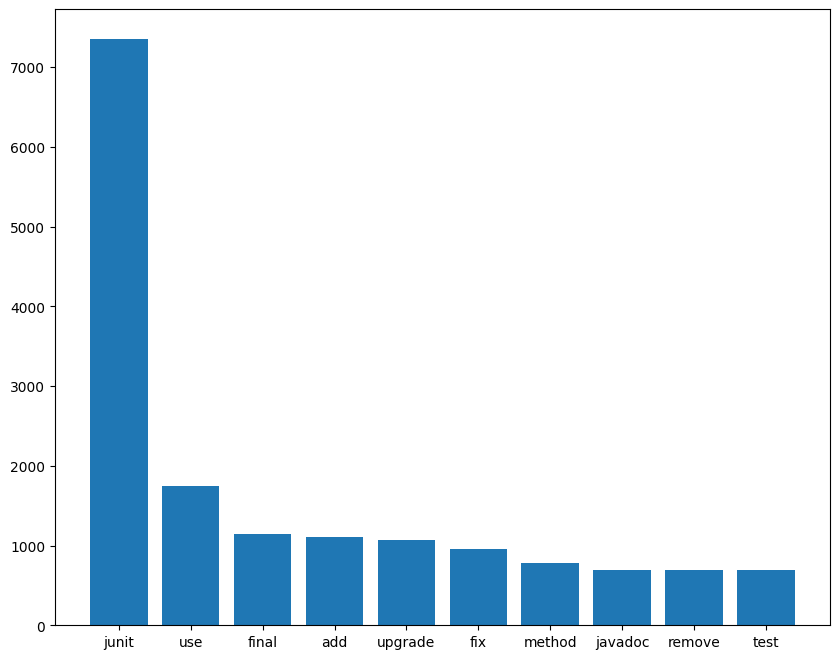

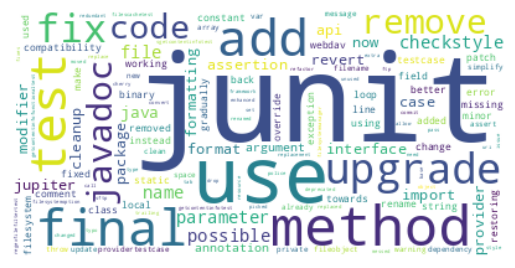

In [10]:
# Create a new dataframe for commits with improved readability
df_improved = df[df['delta_readability'] > 0].copy()
# Preprocess the commit messages in the improved readability dataframe
df_improved['preprocessed_commit_msg'] = df_improved['commit_msg'].apply(preprocess_text)

# frequency of words
text_frequency = df_improved['commit_msg'].apply(preprocess_text).str.split(expand=True).stack()
text_frequency = Counter(text_frequency)
most_common_words = text_frequency.most_common(10)
frequency = pd.DataFrame(most_common_words, columns=['word', 'frequency'])
plt.figure(figsize=(10, 8))
display (frequency)
plt.bar(frequency['word'], frequency['frequency'])
plt.show()


# Create a Wordcloud for improved readability
improved_wordcloud = wordcloud.WordCloud(collocations = False, background_color='white').generate(' '.join(df_improved['preprocessed_commit_msg']))
plt.imshow(improved_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h1> Decreased Readability </h1>

,word,frequency
0,junit,5159
1,use,1630
2,add,1064
3,upgrade,940
4,fix,927
5,remove,834
6,test,730
7,names,702
8,javadoc,681
9,java,652


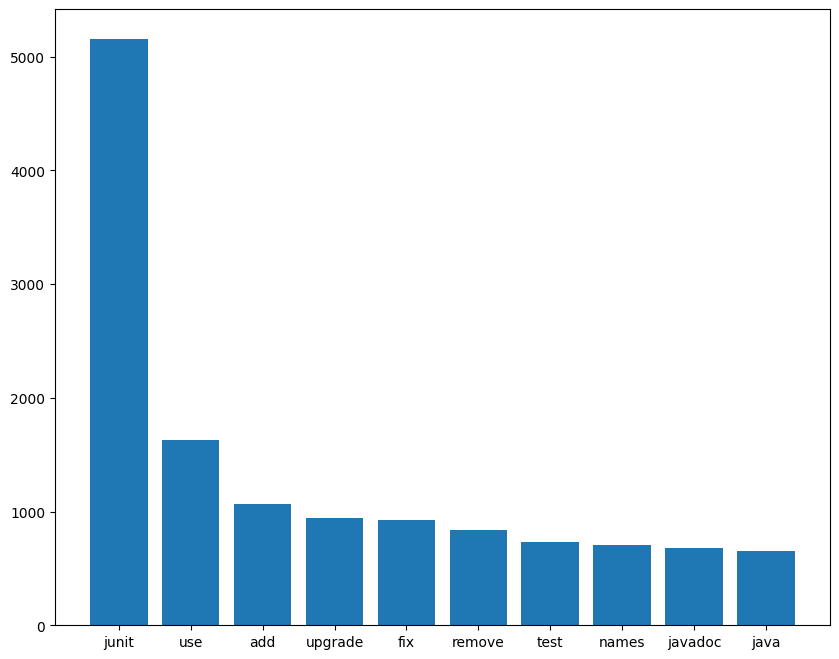

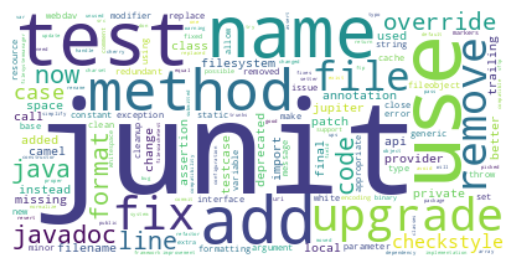

In [11]:

# Create a new dataframe for commits with decreased readability
df_decreased = df[df['delta_readability'] < 0].copy()
# Preprocess the commit messages in the decreased readability dataframe
df_decreased['preprocessed_commit_msg'] = df_decreased['commit_msg'].apply(preprocess_text)

# frequency of words
text_frequency = df_decreased['commit_msg'].apply(preprocess_text).str.split(expand=True).stack()
text_frequency = Counter(text_frequency)
most_common_words = text_frequency.most_common(10)

frequency = pd.DataFrame(most_common_words, columns=['word', 'frequency'])
plt.figure(figsize=(10, 8))
display (frequency)
plt.bar(frequency['word'], frequency['frequency'])
plt.show()


# Create a Wordcloud for decreased readability
decreased_wordcloud = wordcloud.WordCloud(collocations= False, background_color='white').generate(' '.join(df_decreased['preprocessed_commit_msg']))
plt.imshow(decreased_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h1> boxplot </h1>

In [2]:
"""
Identify the existence of keywords in commits
"""

import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from textstat import flesch_kincaid_grade, automated_readability_index
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from math import sqrt

# Load the dataset of commits
commits_df = pd.read_csv('final.csv')

# Identify commits where the intent is to increase readability
keywords = ['refactor', 'rename', 'simplify', 'comment', 'reorganize', 'clarify', 'extract', 'add', 'test', 'clean up']




# readability_df = pd.DataFrame(columns=['commit_msg','readability_before', 'redability_after', 'delta_readability'])
readability_df = pd.DataFrame(columns=['commit_msg', 'delta_readability', 'readability_before', 'readability_after'])

for index, row in commits_df.iterrows():
    commit_message = row['commit_msg']
    delta_readability = row['delta_readability']
    for keyword in keywords:
        if keyword in commit_message:
            before_score = row['readability_before']
            after_score = row['readability_after']
            delta = before_score - after_score
            if delta > 0:

                readability_df = readability_df.append({'commit_msg': commit_message, 'delta_readability': delta_readability, 'readability_before': before_score, 'readability_after': after_score}, ignore_index=True)


[nltk_data] Downloading package punkt to /home/mahshid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_38799/633598103.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  readability_df = readability_df.append({'commit_msg': commit_message, 'delta_readability': delta_readability, 'readability_before': before_score, 'readability_after': after_score}, ignore_index=True)
/tmp/ipykernel_38799/633598103.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  readability_df = readability_df.append({'commit_msg': commit_message, 'delta_readability': delta_readability, 'readability_before': before_score, 'readability_after': after_score}, ignore_index=True)
/tmp/ipykernel_38799/633598103.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [3]:
def contain_keywords(commit_message):
    keywords = ['refactor', 'rename', 'simplify', 'comment', 'reorganize', 'clarify', 'extract', 'add', 'test', 'clean up']
    for keyword in keywords:
        if keyword in commit_message:
            return True
    return False

In [4]:
commits_df["has_del"] = commits_df["commit_msg"].apply(contain_keywords)

In [5]:
dlbrt_group = commits_df[commits_df["has_del"] == True]["delta_readability"]
nondlbrt_group = commits_df[commits_df["has_del"] != False]["delta_readability"]

In [6]:
dlbrt_group = dlbrt_group.dropna()
nondlbrt_group = nondlbrt_group.dropna()

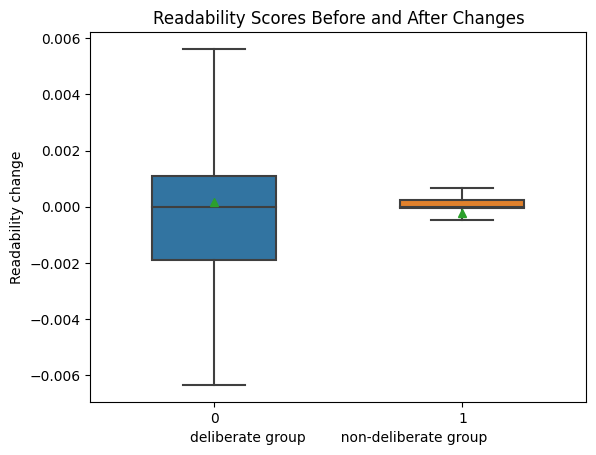

In [7]:
# Calculate the effect size and test for significance
before_scores = dlbrt_group

after_scores = nondlbrt_group

effect_size = abs(before_scores.mean() - after_scores.mean()) / sqrt((before_scores.std() ** 2 + after_scores.std() ** 2) / 2)
t_stat, p_value = ttest_ind(before_scores, after_scores)
mwu_stat, mwu_p_value = mannwhitneyu(before_scores, after_scores)

# Visualize the distribution of readability scores
plt.figure()
sns.boxplot(data= [dlbrt_group, nondlbrt_group], showfliers=False, width=0.5, linewidth=1.5, showmeans=True)
plt.title('Readability Scores Before and After Changes')
plt.xlabel('non-deliberate group        deliberate group')
plt.ylabel('Readability change')
plt.show()

In [8]:
dlbrt_group

0       -3.059969e-03
1        2.492660e-08
9       -9.227225e-04
12      -8.399776e-05
20       6.226033e-03
             ...     
28162    8.098006e-04
28212   -2.171270e-03
28213   -4.000341e-03
28214    4.769770e-02
28229   -2.316102e-02
Name: delta_readability, Length: 3931, dtype: float64

In [9]:
nondlbrt_group

2        0.000291
3       -0.000040
4       -0.003126
5        0.012551
6       -0.002188
           ...   
28236    0.032729
28237    0.000070
28238   -0.000217
28239    0.000266
28240    0.003274
Name: delta_readability, Length: 23129, dtype: float64